<a href="https://colab.research.google.com/github/R2D2-like/roomba_hack/blob/tsuji/clip_%E7%94%BB%E5%83%8F%E5%87%A6%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


!pip install torch==1.7.1{torch_version_suffix} torchvision==0.8.2{torch_version_suffix} -f https://download.pytorch.org/whl/torch_stable.html ftfy regex
!pip install git+https://github.com/openai/CLIP.git
!pip install ftfy regex tqdm



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.7.1{torch_version_suffix} (from versions: 0.4.1, 0.4.1.post2, 1.0.0, 1.0.1, 1.0.1.post2, 1.1.0, 1.2.0, 1.2.0+cpu, 1.2.0+cu92, 1.3.0, 1.3.0+cpu, 1.3.0+cu100, 1.3.0+cu92, 1.3.1, 1.3.1+cpu, 1.3.1+cu100, 1.3.1+cu92, 1.4.0, 1.4.0+cpu, 1.4.0+cu100, 1.4.0+cu92, 1.5.0, 1.5.0+cpu, 1.5.0+cu101, 1.5.0+cu92, 1.5.1, 1.5.1+cpu, 1.5.1+cu101, 1.5.1+cu92, 1.6.0, 1.6.0+cpu, 1.6.0+cu101, 1.6.0+cu92, 1.7.0, 1.7.0+cpu, 1.7.0+cu101, 1.7.0+cu110, 1.7.0+cu92, 1.7.1, 1.7.1+cpu, 1.7.1+cu101, 1.7.1+cu110, 1.7.1+cu92, 1.7.1+rocm3.7, 1.7.1+rocm3.8, 1.8.0, 1.8.0+cpu, 1.8.0+cu101, 1.8.0+cu111, 1.8.0+rocm3.10, 1.8.0+rocm4.0.1, 1.8.1, 1.8.1+cpu, 1.8.1+cu101, 1.8.1+cu102, 1.8.1+cu111, 1.8.1+rocm3.10, 1.8.1+rocm4.0.1, 1.9.0, 1.9.0+cpu, 1.9.0+cu102, 1.9.0+cu111, 1.9.0+rocm4.0.1, 1.9.0+

In [2]:


from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:


img_path='/content/drive/MyDrive/roombahack_groupc/20220917/IMG_9386.JPG'



In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(3024, 4032, 3)
1512.0


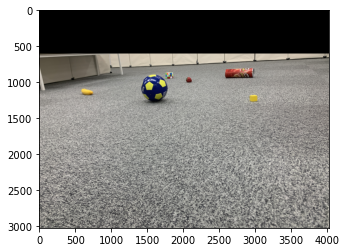

In [25]:
image = cv2.imread(img_path) # ファイル読み込み

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # 画像をHSVに変換
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
rec = np.zeros_like(image)
print(rec.shape)
a = rec.shape[0]/2
print(a)
cv2.rectangle(rec, (0,int(rec.shape[0]*1/5)), (int(rec.shape[1]),int(rec.shape[0])), (255, 255, 255), -1)

croped = cv2.bitwise_and(image, rec)
plt.imshow(croped)

# HSVでの色抽出
hsvLower = np.array([20, 80, 10])    # 抽出する色の下限(HSV)
hsvUpper = np.array([50, 255, 255])    # 抽出する色の上限(HSV)

hsv_mask = cv2.inRange(hsv, hsvLower, hsvUpper)    # HSVからマスクを作成
#result = cv2.bitwise_and(image, image, mask=hsv_mask)

    # 赤色のHSVの値域1
hsv_min = np.array([0,64,0])
hsv_max = np.array([30,255,255])
mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

    # 赤色のHSVの値域2
hsv_min = np.array([150,64,0])
hsv_max = np.array([179,255,255])
mask2 = cv2.inRange(hsv, hsv_min, hsv_max)

# 青色のHSVの値域1
hsv_min = np.array([90, 64, 0])
hsv_max = np.array([150,255,255])

    # 青色領域のマスク（255：赤色、0：赤色以外）    
mask3 = cv2.inRange(hsv, hsv_min, hsv_max)

   # 緑色のHSVの値域1
hsv_min = np.array([30, 64, 0])
hsv_max = np.array([90,255,255])

    # 緑色領域のマスク（255：赤色、0：赤色以外）    
mask4 = cv2.inRange(hsv, hsv_min, hsv_max)


mask = hsv_mask + mask1 + mask2 + mask3 + mask4

result = cv2.bitwise_and(croped, croped, mask=mask)


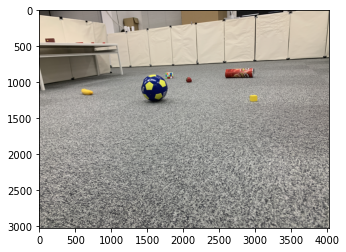

In [6]:
plt.imshow(image)

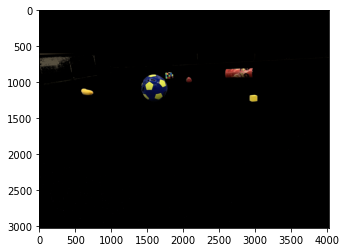

In [7]:
plt.imshow(result)

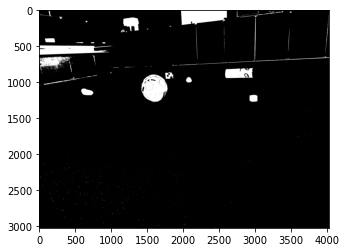

In [8]:
plt.imshow(mask, cmap='gray')

In [22]:
import cv2
import numpy as np
from IPython import display
from matplotlib import pyplot as plt


# def imshow(img, format=".jpg", **kwargs):
#     """ndarray 配列をインラインで Notebook 上に表示する。
#     """
#     img = cv2.imencode(format, img)[1]
#     img = display.Image(img, **kwargs)
#     display.display(img)


def draw_contours(img, contours, ax):
    """輪郭の点及び線を画像上に描画する。
    """
    ax.imshow(img)
    ax.set_axis_off()

    for i, cnt in enumerate(contours):
        # 形状を変更する。(NumPoints, 1, 2) -> (NumPoints, 2)
        cnt = cnt.squeeze(axis=1)
        # 輪郭の点同士を結ぶ線を描画する。
        ax.add_patch(plt.Polygon(cnt, color="b", fill=None, lw=2))
        # 輪郭の点を描画する。
        ax.plot(cnt[:, 0], cnt[:, 1], "ro", mew=0, ms=4)
        # 輪郭の番号を描画する。
        ax.text(cnt[0][0], cnt[0][1], i, color="r", size="20", bbox=dict(fc="w"))

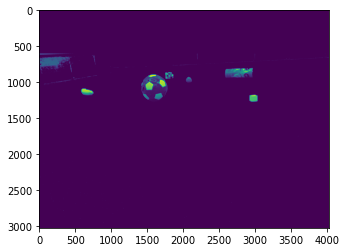

In [26]:
gray = cv2.cvtColor(result,cv2.COLOR_RGB2GRAY)
plt.imshow(gray)

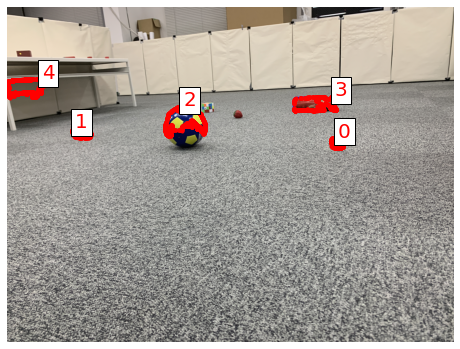

In [27]:

# # 2値化する
ret, bin_img = cv2.threshold(gray, 20, 255, cv2.THRESH_BINARY)

# 輪郭を抽出する。
contours, hierarchy = cv2.findContours(
    bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)
contours2 = list(filter(lambda x: cv2.contourArea(x) >= 8000, contours))
fig, ax = plt.subplots(figsize=(8, 8))
draw_contours(image, contours2, ax)
plt.show()

contour: 0, topleft: (2924, 1177), width: 116, height: 97
contour: 1, topleft: (586, 1090), width: 171, height: 92
contour: 2, topleft: (1423, 895), width: 365, height: 272
contour: 3, topleft: (2588, 806), width: 385, height: 134
contour: 4, topleft: (0, 646), width: 429, height: 172


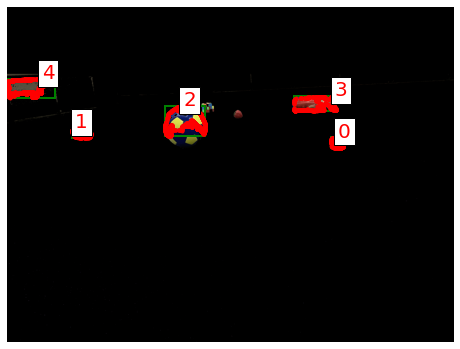

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))
draw_contours(result, contours2, ax)

for i, cnt in enumerate(contours2):
    # 輪郭に外接する長方形を取得する。
    x, y, width, height = cv2.boundingRect(cnt)
    print(f"contour: {i}, topleft: ({x}, {y}), width: {width}, height: {height}")

    # 長方形を描画する。
    ax.add_patch(
        plt.Rectangle(xy=(x, y), width=width, height=height, color="g", fill=None, lw=2)
    )

plt.show()

In [20]:
for i, cnt in enumerate(contours2):
    # 輪郭に外接する長方形を取得する。
    x, y, width, height = cv2.boundingRect(cnt)
    tmp_mask = np.zeros_like(mask)
    tmp_mask[y:y+height, x:x+width] = 1
    fin = cv2.bitwise_and(image, image, mask=tmp_mask)
    #print(f"contour: {i}, topleft: ({x}, {y}), width: {width}, height: {height}")
    plt.imshow(fin)

error: ignored

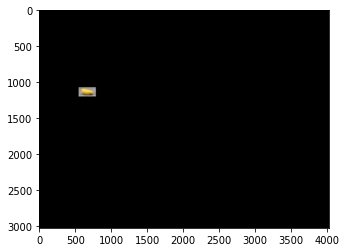

In [29]:

    # 輪郭に外接する長方形を取得する。
x, y, width, height = cv2.boundingRect(contours2[1])
tmp_mask = np.zeros_like(mask)
#tmp_mask[inty:y+height, x:x+width] = 1
tmp_mask[int(y-height/5):int(y+height*6/5),int(x-width/5):int(x+width*6/5)] = 1
fin = cv2.bitwise_and(image, image, mask=tmp_mask)
    #print(f"contour: {i}, topleft: ({x}, {y}), width: {width}, height: {height}")
plt.imshow(fin)

In [30]:
texts=["a strawberry","a sports ball","an apple","a banana","a toy plane","a chips can","a rubiks cube","a yellow wood block"]
texts2=["a photo of a strawberry, a type of fruit","a photo of a blue sports ball","a photo of an apple, a type of fruit","a photo of a yellow banana, type of fruit","a phot of a toy plane","a photo of a chips can ","a photo of a colorful rubiks cube","a photo of a yellow cube"]

In [31]:
import torch
import clip
from PIL import Image
image_pil = Image.fromarray(fin)
image_pil = image_pil.convert('RGB')

# モデルの読み込み
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-L/14@336px", device=device)

# 画像とテキストの準備
#image = preprocess(Image.open(img_path)).unsqueeze(0).to(device)
image = preprocess(image_pil).unsqueeze(0).to(device)
text = clip.tokenize(texts2).to(device)

with torch.no_grad():
    # 画像とテキストのエンコード
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)

    # 推論
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()
idx=np.argmax(probs)
# 類似率の出力
print("Label probs:", probs, texts[idx])

print(type(probs))



Label probs: [[4.921e-03 8.683e-04 1.886e-02 1.329e-01 3.110e-02 6.055e-01 2.748e-05
  2.059e-01]] a chips can
<class 'numpy.ndarray'>


(3024, 4032, 3)
1512.0


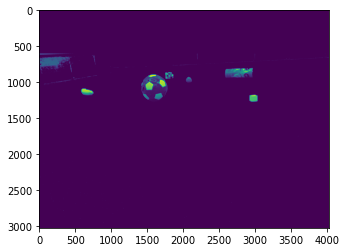

In [32]:
img_path='/content/drive/MyDrive/roombahack_groupc/20220917/IMG_9386.JPG'
image = cv2.imread(img_path) # ファイル読み込み

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # 画像をHSVに変換
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
rec = np.zeros_like(image)
print(rec.shape)
a = rec.shape[0]/2
print(a)
cv2.rectangle(rec, (0,int(rec.shape[0]*1/5)), (int(rec.shape[1]),int(rec.shape[0])), (255, 255, 255), -1)

croped = cv2.bitwise_and(image, rec)
plt.imshow(croped)

# HSVでの色抽出
hsvLower = np.array([20, 80, 10])    # 抽出する色の下限(HSV)
hsvUpper = np.array([50, 255, 255])    # 抽出する色の上限(HSV)

hsv_mask = cv2.inRange(hsv, hsvLower, hsvUpper)    # HSVからマスクを作成
#result = cv2.bitwise_and(image, image, mask=hsv_mask)

    # 赤色のHSVの値域1
hsv_min = np.array([0,64,0])
hsv_max = np.array([30,255,255])
mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

    # 赤色のHSVの値域2
hsv_min = np.array([150,64,0])
hsv_max = np.array([179,255,255])
mask2 = cv2.inRange(hsv, hsv_min, hsv_max)

# 青色のHSVの値域1
hsv_min = np.array([90, 64, 0])
hsv_max = np.array([150,255,255])

    # 青色領域のマスク（255：赤色、0：赤色以外）    
mask3 = cv2.inRange(hsv, hsv_min, hsv_max)

   # 緑色のHSVの値域1
hsv_min = np.array([30, 64, 0])
hsv_max = np.array([90,255,255])

    # 緑色領域のマスク（255：赤色、0：赤色以外）    
mask4 = cv2.inRange(hsv, hsv_min, hsv_max)


mask = hsv_mask + mask1 + mask2 + mask3 + mask4

result = cv2.bitwise_and(croped, croped, mask=mask)
gray = cv2.cvtColor(result,cv2.COLOR_RGB2GRAY)
plt.imshow(gray)

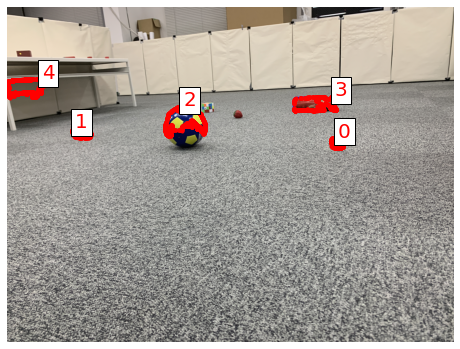

In [33]:

# # 2値化する
ret, bin_img = cv2.threshold(gray, 20, 255, cv2.THRESH_BINARY)

# 輪郭を抽出する。
contours, hierarchy = cv2.findContours(
    bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)
contours2 = list(filter(lambda x: cv2.contourArea(x) >= 8000, contours))
fig, ax = plt.subplots(figsize=(8, 8))
draw_contours(image, contours2, ax)
plt.show()

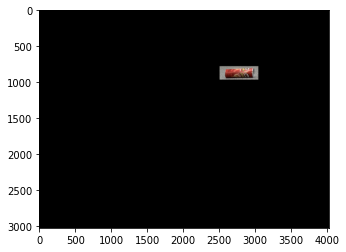

In [34]:
target_idx = 3
    # 輪郭に外接する長方形を取得する。
x, y, width, height = cv2.boundingRect(contours2[target_idx])
tmp_mask = np.zeros_like(mask)
#tmp_mask[inty:y+height, x:x+width] = 1
tmp_mask[int(y-height/5):int(y+height*6/5),int(x-width/5):int(x+width*6/5)] = 1
fin = cv2.bitwise_and(image, image, mask=tmp_mask)
    #print(f"contour: {i}, topleft: ({x}, {y}), width: {width}, height: {height}")
plt.imshow(fin)

In [35]:
import torch
import clip
from PIL import Image
image_pil = Image.fromarray(fin)
image_pil = image_pil.convert('RGB')

# モデルの読み込み
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-L/14@336px", device=device)

# 画像とテキストの準備
#image = preprocess(Image.open(img_path)).unsqueeze(0).to(device)
image = preprocess(image_pil).unsqueeze(0).to(device)
text = clip.tokenize(texts2).to(device)

with torch.no_grad():
    # 画像とテキストのエンコード
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)

    # 推論
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()
idx=np.argmax(probs)
# 類似率の出力
print("Label probs:", probs, texts[idx])

print(type(probs))

Label probs: [[7.496e-03 1.618e-04 3.828e-03 8.411e-04 3.431e-03 9.819e-01 4.745e-05
  2.359e-03]] a chips can
<class 'numpy.ndarray'>
